In [2]:
cd ..

/Users/jbud/Desktop/Galvanize/repos/COVID_CO_Disparity


In [4]:
# %load src/main.py
import pandas as pd

def load_and_clean_data(save = False):
    aqi_df = pd.read_csv('data/aqireport2019.csv')
    aqi_df['County'] = aqi_df['County'].apply(lambda x: x.replace(' County, CO', ''))
    pop_perc_df = pd.read_csv(
        'data/PopulationByRaceEthnicity2019/Share of Total Population-Table 1.csv')
    pop_num_df = pd.read_csv(
        'data/PopulationByRaceEthnicity2019/PopulationTotals-Table 1.csv')
    if save == True:
        aqi_df.to_csv('data/aqiCO_2019.csv')
    return aqi_df, pop_perc_df, pop_num_df

if __name__ == '__main__':
    aqi_df, pop_perc_df, pop_num_df = load_and_clean_data()


In [39]:
scatter_aqi_df = aqi_df.drop(['# Days with AQI', 'County Code', '# Days CO'], axis = 1)
scatter_aqi_df.replace('.', 0, inplace = True)
cols = scatter_aqi_df.columns[1:].values
scatter_aqi_df[cols] = scatter_aqi_df[cols].apply(pd.to_numeric)

In [6]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1223bec18>,
      dtype=object)

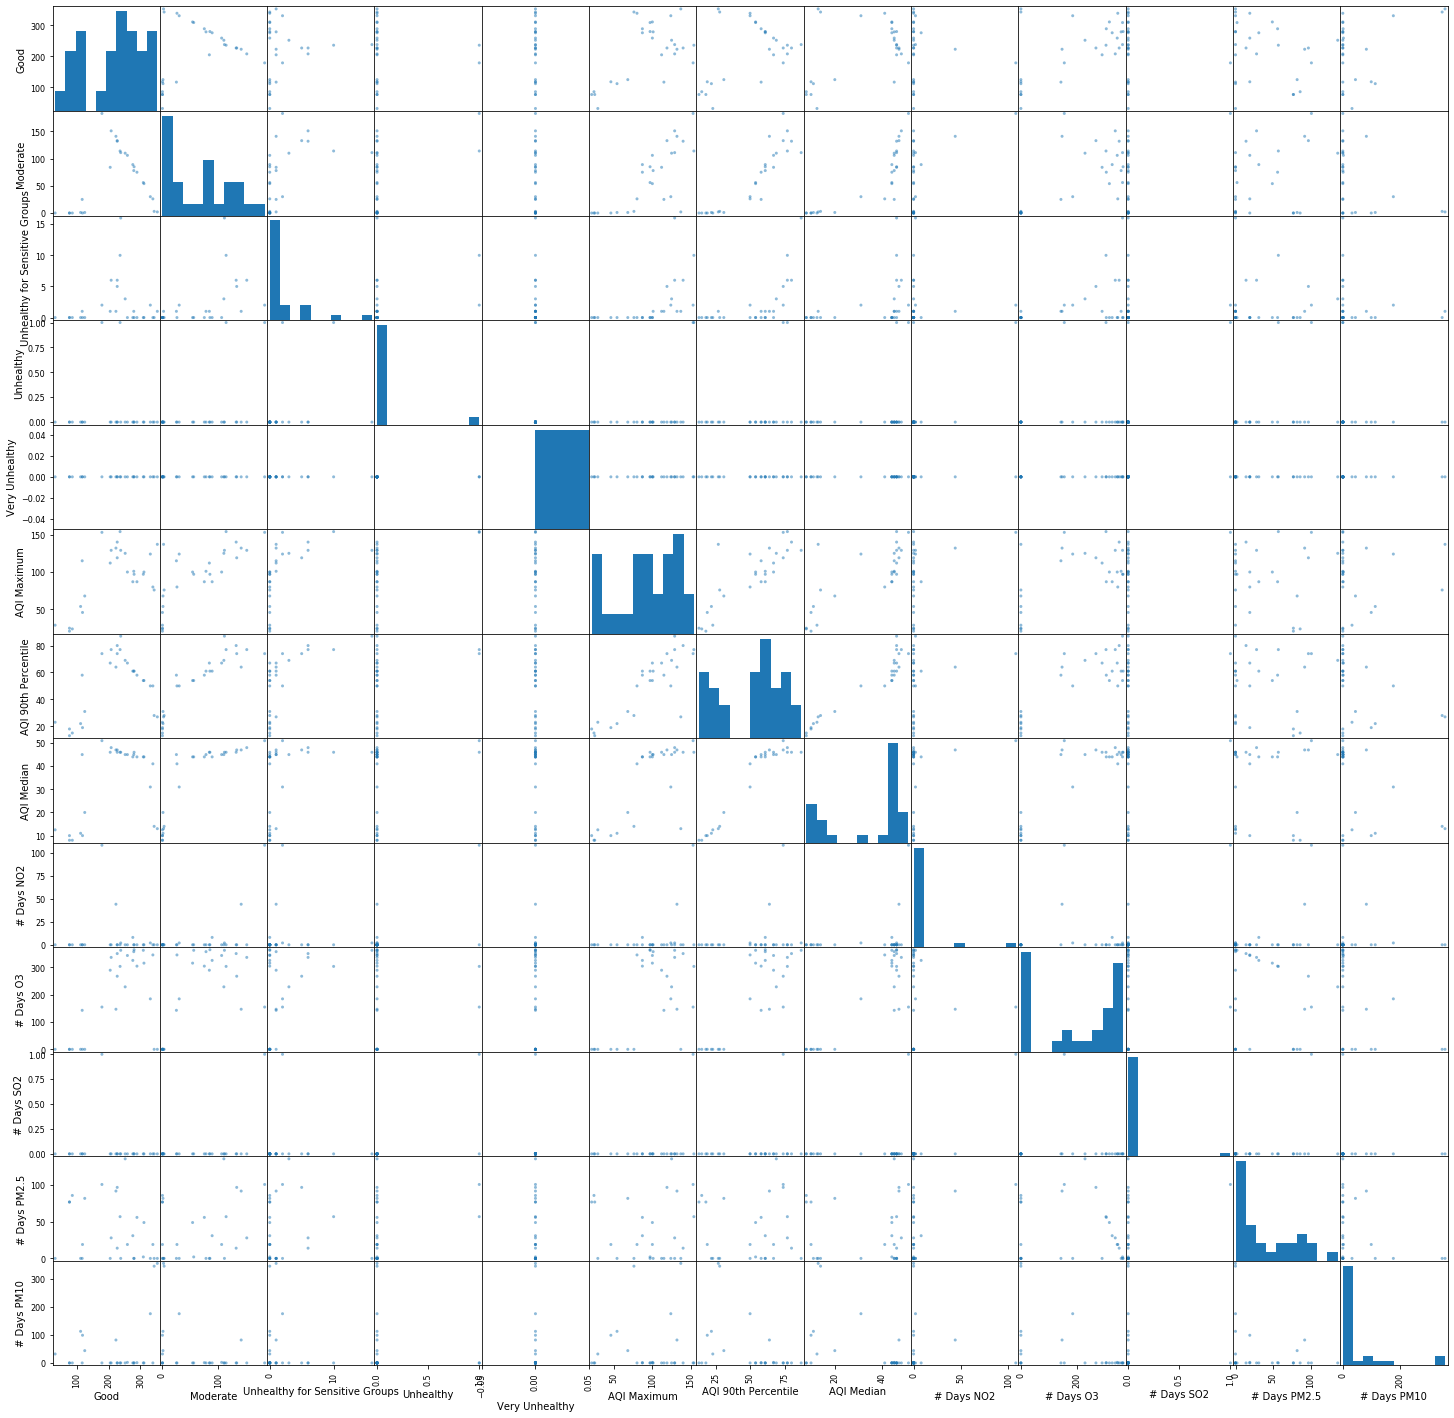

In [41]:
scatter_matrix(scatter_aqi_df, figsize = (25,25))

In [4]:
run src/main.py

In [5]:
outbreak_df

,Setting name,Investigation status,Closed Date,Setting type,Exposure County,Start Date,Residents Confirmed Positive,Residents Probable Positive,Residents Confirmed Deaths,Residents Probable Deaths,Staff Confirmed Positive,Staff Probable Positive,Staff Confirmed Deaths,Staff Probable Deaths,Attendees Confirmed Positive,Attendees Probable Positive,Attendees Confirmed Deaths,Attendees Probable Deaths
0,1111 Camino Del Rio Hotel Construction Site,Resolved,2020-06-29,Other,La Plata,2020-06-01,0,0,0,0,5,0,0,0,0,0,0,0
1,48 Forty Solutions,Active,2200-01-01,Other,Adams,2020-05-21,0,0,0,0,6,0,0,0,0,0,0,0
2,"701 E 5th St. Rifle, CO Construction Site",Active,2200-01-01,Other,Garfield,2020-06-22,0,0,0,0,6,0,0,0,0,0,0,0
3,995 Regent Drive,Resolved,2020-05-22,Other,Boulder,2020-04-24,0,0,0,0,4,0,0,0,0,0,0,0
4,ABC Child Development Center,Active,2200-01-01,Child care center,Weld,2020-06-29,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,White House Pizza/Pepperoni Pizza Kitchen,Active,2200-01-01,Restaurant sit down,Garfield,2020-06-30,0,0,0,0,3,0,0,0,0,0,0,0
410,Wind Crest,Active,2200-01-01,Independent Living Facility,Douglas,2020-03-30,7,2,2,0,4,43,0,0,0,0,0,0
411,Windigo Logistics,Active,2200-01-01,Other,El Paso,2020-05-18,0,0,0,0,4,3,0,0,0,0,0,0
412,Winslow Court Retirement Community (230512),Resolved,2020-06-11,Healthcare other,El Paso,2020-04-01,25,4,11,0,9,3,0,0,0,0,0,0


In [66]:
county_group_df = outbreak_df.groupby('Exposure County').sum()
combine_cols(county_group_df, ['Residents Confirmed Positive', 'Staff Confirmed Positive', 'Attendees Confirmed Positive',], col_sum = 'Confirmed Positive')
combine_cols(county_group_df, ['Residents Probable Positive', 'Staff Probable Positive', 'Attendees Probable Positive',], col_sum = 'Probable Positive')
combine_cols(county_group_df, ['Residents Confirmed Deaths', 'Staff Confirmed Deaths', 'Attendees Confirmed Deaths',], col_sum = 'Confirmed Deaths')
combine_cols(county_group_df, ['Residents Probable Deaths', 'Staff Probable Deaths', 'Attendees Probable Deaths',], col_sum = 'Probable Deaths')

,Confirmed Positive,Probable Positive,Confirmed Deaths,Probable Deaths
Exposure County,,,,
Adams,674,171,65,2
Alamosa,96,28,2,0
Arapahoe,1260,334,176,41
Boulder,280,127,46,7
Broomfield,101,12,25,2
Chaffee,47,12,12,2
Cheyenne,26,0,0,0
Colorado,717,3,3,0
Costilla,3,0,0,0


In [68]:
county_group_df.to_csv('data/county.csv')

In [61]:
list(county_group_df.columns)

['Residents Confirmed Positive',
 'Residents Probable Positive',
 'Resident Confirmed Deaths',
 'Resident Probable Deaths',
 'Staff Confirmed Positive',
 'Staff Probable Positive',
 'Staff Confirmed Deaths',
 'Staff Probable Deaths',
 'Attendees Confirmed Positive',
 'Attendees Probable Positive',
 'Attendees Confirmed Deaths',
 'Attendees Probable Deaths']

In [62]:
combine_cols(county_group_df, ['Residents Confirmed Positive', 'Staff Confirmed Positive', 'Attendees Confirmed Positive',], col_sum = 'Confirmed Positive')

,Residents Probable Positive,Resident Confirmed Deaths,Resident Probable Deaths,Staff Probable Positive,Staff Confirmed Deaths,Staff Probable Deaths,Attendees Probable Positive,Attendees Confirmed Deaths,Attendees Probable Deaths,Confirmed Positive
Exposure County,,,,,,,,,,
Adams,24,62,2,147,3,0,0,0,0,674
Alamosa,7,2,0,21,0,0,0,0,0,96
Arapahoe,150,166,41,183,10,0,1,0,0,1260
Boulder,54,46,7,73,0,0,0,0,0,280
Broomfield,5,25,2,7,0,0,0,0,0,101
Chaffee,7,12,2,5,0,0,0,0,0,47
Cheyenne,0,0,0,0,0,0,0,0,0,26
Colorado,0,3,0,3,0,0,0,0,0,717
Costilla,0,0,0,0,0,0,0,0,0,3


In [33]:
import matplotlib.pyplot as plt
setting_df = outbreak_df.groupby('Setting type').sum()
# plt.bar(setting_df.index, setting_df[setting_df.columns])

In [37]:
setting_df.to_csv('data/setting.csv')

In [42]:
county_group_df

,Residents Confirmed Positive,Residents Probable Positive,Resident Confirmed Deaths,Resident Probable Deaths,Staff Confirmed Positive,Staff Probable Positive,Staff Confirmed Deaths,Staff Probable Deaths,Attendees Confirmed Positive,Attendees Probable Positive,Attendees Confirmed Deaths,Attendees Probable Deaths
Exposure County,,,,,,,,,,,,
Adams,200,24,62,2,474,147,3,0,0,0,0,0
Alamosa,37,7,2,0,59,21,0,0,0,0,0,0
Arapahoe,641,150,166,41,618,183,10,0,1,1,0,0
Boulder,134,54,46,7,146,73,0,0,0,0,0,0
Broomfield,63,5,25,2,38,7,0,0,0,0,0,0
Chaffee,37,7,12,2,10,5,0,0,0,0,0,0
Cheyenne,0,0,0,0,26,0,0,0,0,0,0,0
Colorado,672,0,3,0,45,3,0,0,0,0,0,0
Costilla,0,0,0,0,3,0,0,0,0,0,0,0


In [6]:
run src/PPP.py

In [7]:
PPP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104403 entries, 0 to 126198
Data columns (total 14 columns):
LoanAmount       104403 non-null object
City             104403 non-null object
State            104403 non-null object
Zip              104403 non-null float64
NAICSCode        104403 non-null float64
BusinessType     104403 non-null object
RaceEthnicity    104403 non-null object
Gender           104403 non-null object
Veteran          104403 non-null object
NonProfit        104403 non-null int64
JobsRetained     104403 non-null float64
DateApproved     104403 non-null object
Lender           104403 non-null object
CD               104403 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 11.9+ MB


In [8]:
PPP_df

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149995,PARKER,CO,80134.0,541618.0,Subchapter S Corporation,White,Unanswered,Unanswered,0,9.0,04/29/2020,"Harvest Small Business Finance, LLC",CO - 04
1,149947,SNOWMASS VLG,CO,81615.0,-1.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,0,11.0,05/03/2020,"U.S. Bank, National Association",CO - 03
2,149945,DENVER,CO,80221.0,221115.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,0,19.0,04/28/2020,Customers Bank,CO - 01
3,149925,MONUMENT,CO,80132.0,541940.0,Corporation,Unanswered,Female Owned,Non-Veteran,0,15.0,04/07/2020,Integrity Bank & Trust,CO - 04
4,149900,DENVER,CO,80230.0,484121.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,0,9.0,04/29/2020,Colorado Enterprise Fund,CO - 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126194,"e $150,000-350,000",MONTEZUMA,CO,80435.0,624410.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,1,26.0,04/14/2020,"U.S. Bank, National Association",CO - 02
126195,"e $150,000-350,000",DENVER,CO,80239.0,423910.0,Corporation,Unanswered,Male Owned,Non-Veteran,0,17.0,04/28/2020,KeyBank National Association,CO - 01
126196,"e $150,000-350,000",ENGLEWOOD,CO,80112.0,541512.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,0,18.0,04/12/2020,KeyBank National Association,CO - 04
126197,"e $150,000-350,000",GREENWOOD VILLAGE,CO,80111.0,519190.0,Corporation,Unanswered,Unanswered,Unanswered,0,17.0,05/01/2020,Northeast Bank,CO - 01


In [9]:
convert_to_boolean(PPP_df, 'Gender', 'Male Owned', with_unknown = 'Unanswered')
convert_to_boolean(PPP_df, 'Veteran', 'Veteran', with_unknown = 'Unanswered')

/Users/jbud/Desktop/Galvanize/repos/COVID_CO_Disparity/src/PPP.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] == def_1] = 1
/Users/jbud/Desktop/Galvanize/repos/COVID_CO_Disparity/src/PPP.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] == with_unknown] = -1
/Users/jbud/Desktop/Galvanize/repos/COVID_CO_Disparity/src/PPP.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] != 1) & (

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149995,PARKER,CO,80134.0,541618.0,Subchapter S Corporation,White,-1,-1,0,9.0,04/29/2020,"Harvest Small Business Finance, LLC",CO - 04
1,149947,SNOWMASS VLG,CO,81615.0,-1.0,Limited Liability Company(LLC),Unanswered,-1,-1,0,11.0,05/03/2020,"U.S. Bank, National Association",CO - 03
2,149945,DENVER,CO,80221.0,221115.0,Limited Liability Company(LLC),Unanswered,-1,-1,0,19.0,04/28/2020,Customers Bank,CO - 01
3,149925,MONUMENT,CO,80132.0,541940.0,Corporation,Unanswered,0,0,0,15.0,04/07/2020,Integrity Bank & Trust,CO - 04
4,149900,DENVER,CO,80230.0,484121.0,Subchapter S Corporation,Unanswered,-1,-1,0,9.0,04/29/2020,Colorado Enterprise Fund,CO - 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126194,"e $150,000-350,000",MONTEZUMA,CO,80435.0,624410.0,Non-Profit Organization,Unanswered,-1,-1,1,26.0,04/14/2020,"U.S. Bank, National Association",CO - 02
126195,"e $150,000-350,000",DENVER,CO,80239.0,423910.0,Corporation,Unanswered,1,0,0,17.0,04/28/2020,KeyBank National Association,CO - 01
126196,"e $150,000-350,000",ENGLEWOOD,CO,80112.0,541512.0,Subchapter S Corporation,Unanswered,-1,-1,0,18.0,04/12/2020,KeyBank National Association,CO - 04
126197,"e $150,000-350,000",GREENWOOD VILLAGE,CO,80111.0,519190.0,Corporation,Unanswered,-1,-1,0,17.0,05/01/2020,Northeast Bank,CO - 01


In [14]:
PPP_df['Gender'].unique()[0]

array([-1, 0, 1], dtype=object)

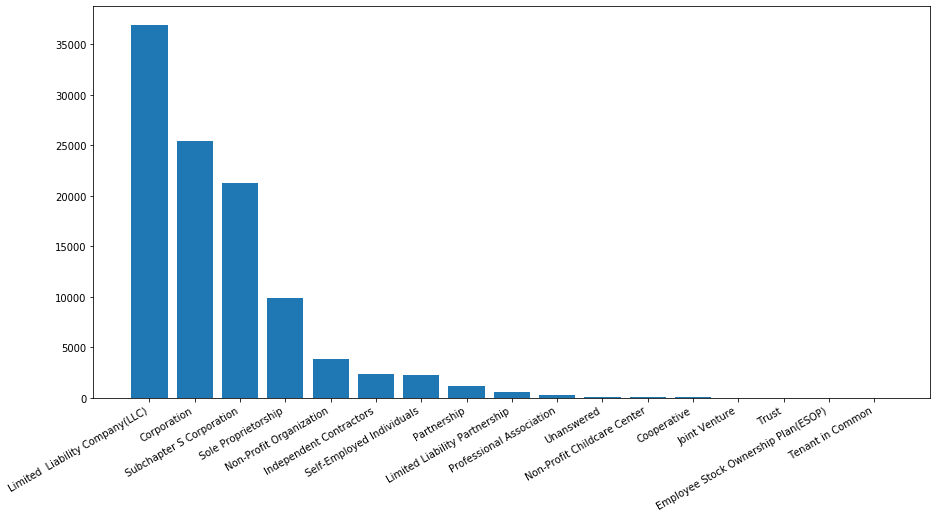

In [135]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(PPP_df['BusinessType'].value_counts().index, PPP_df['BusinessType'].value_counts().values)
fig.autofmt_xdate(rotation=30)

<BarContainer object of 6 artists>

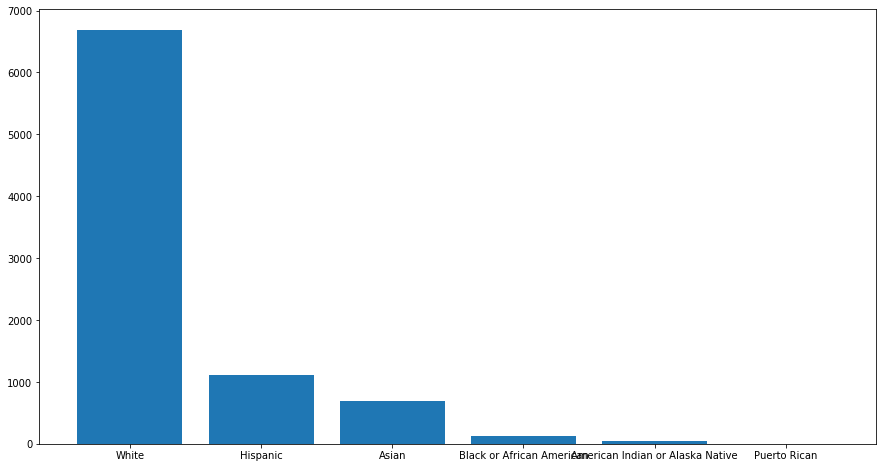

In [117]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(PPP_df['RaceEthnicity'].value_counts().index[1:], PPP_df['RaceEthnicity'].value_counts().values[1:])

In [105]:
plt.show()

In [140]:
PPP_df['Veteran'].value_counts()

Unanswered     90123
Non-Veteran    13448
Veteran          832
Name: Veteran, dtype: int64

In [137]:
PPP_df['Gender'].value_counts()

Unanswered      84931
Male Owned      14668
Female Owned     4804
Name: Gender, dtype: int64

In [147]:
PPP_df.to_csv('data/PPP.csv')

In [12]:
from pandas.plotting import scatter_matrix

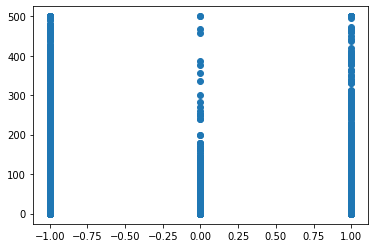

In [16]:
plt.scatter(PPP_df['Gender'],PPP_df['JobsRetained'] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c61afd0>,
      dtype=object)

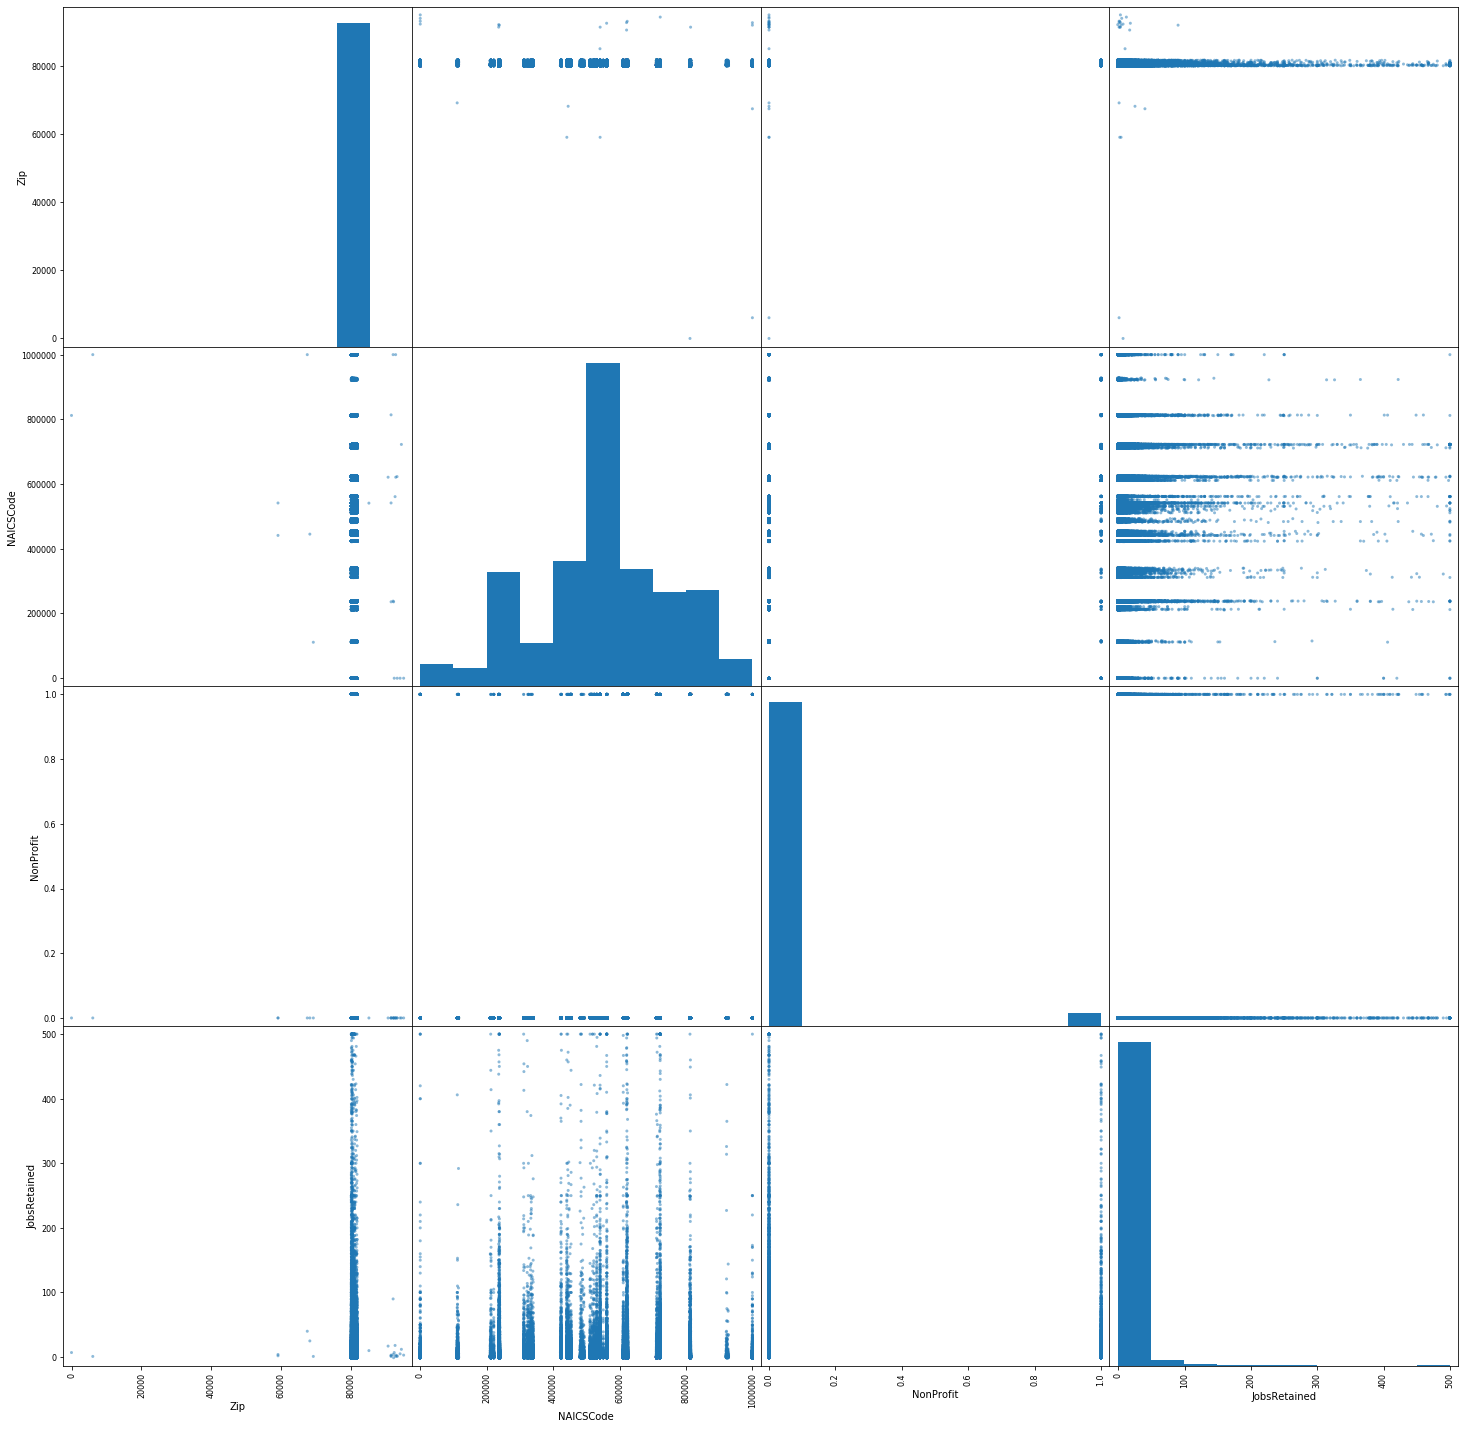

In [13]:
scatter_matrix(PPP_df, figsize = (25,25))